In [1]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [2]:
import pandas as pd
import io

# Replace 'filename.csv' with the actual filename you uploaded
df = pd.read_csv(io.BytesIO(uploaded['placement.csv']))
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df = df.iloc[:,1:]

In [4]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
import matplotlib.pyplot as plt


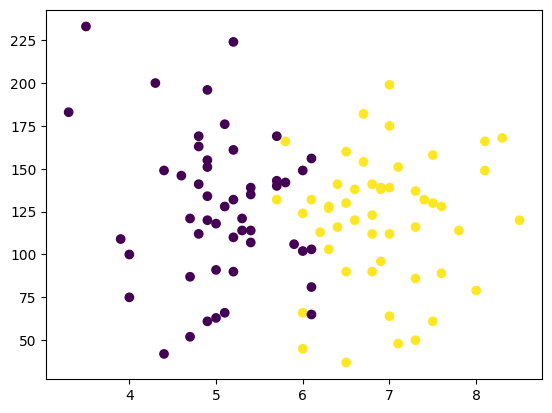

In [10]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [13]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
85,5.8,166.0
2,5.3,121.0
11,6.9,138.0
86,5.1,128.0
80,4.9,196.0
...,...,...
92,5.2,110.0
0,6.8,123.0
90,7.3,86.0
77,7.3,50.0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [18]:
X_train

array([[-0.22794306,  1.07682856],
       [-0.68181199, -0.05623345],
       [ 0.77056858,  0.3718122 ],
       [-0.86335956,  0.12002064],
       [-1.04490714,  1.83220324],
       [-0.86335956, -1.44108702],
       [ 0.6797948 ,  0.44734967],
       [ 0.31669965,  0.44734967],
       [-0.31871685,  0.42217051],
       [-0.77258578,  2.5372196 ],
       [-1.22645471, -1.7935952 ],
       [ 0.22592587, -0.50945825],
       [-0.22794306,  0.47252882],
       [ 0.31669965, -0.18212923],
       [-1.04490714,  0.69914123],
       [ 1.76908023, -1.11375799],
       [-0.04639549, -0.53463741],
       [ 0.0443783 ,  0.82503701],
       [ 0.49824722,  0.3718122 ],
       [ 0.6797948 , -0.83678728],
       [ 0.86134237,  0.39699136],
       [-1.31722849,  0.57324545],
       [ 0.95211615, -1.89431182],
       [-0.77258578,  0.95093279],
       [ 0.40747344, -0.83678728],
       [-0.59103821,  0.29627473],
       [ 0.86134237,  1.90774071],
       [-0.31871685,  0.22073727],
       [ 0.0443783 ,

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_test

array([[-1.95264499, -0.35838332],
       [ 0.86134237,  1.30344097],
       [-0.13716928, -0.43392079],
       [ 2.22294916, -0.0814126 ],
       [-1.13568092,  1.0012911 ],
       [-0.77258578,  0.22073727],
       [-1.04490714, -1.5669828 ],
       [-0.68181199, -0.23248754],
       [-1.58954985,  1.93291986],
       [-1.22645471, -0.91232475]])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [24]:
clf.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred = clf.predict(X_test)

In [26]:
y_test

,placement
31,0
52,1
1,0
69,1
34,0
19,0
73,0
46,0
95,0
23,0


In [28]:

from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

1.0

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

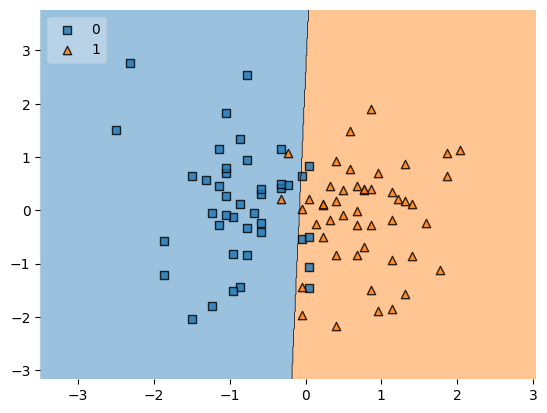

In [31]:

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle